# Ornstein-Uhlenbeck Process Simulation

The Ornstein-Uhlenbeck SDE models a mean reverting random process and is defined by,

$
\begin{align}
dX_t = \lambda \left( \mu - X_t \right) dt + \sigma dB_t
\end{align}
$

where $dB_t \sim \text{Normal}(0, dt)$.

The model can be descritized using the Euler method from continuous differential equations. The stochastic version of it is called</br>
the [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) method. Replacing the continuous differential with finite differences gives,

$
\begin{align}
&\Delta X_t = \lambda \left( \mu - X_t \right) \Delta t + \sigma \Delta B_t \\
\Rightarrow &X_{t+1} = X_t + \lambda \left( \mu - X_t \right) \Delta t + \sigma \Delta B_t
\end{align}
$

but $\Delta B_t \sim \text{Normal}(0, \Delta t)$. It follows that the simulated model is given by,

$
\begin{align}
X_{t+1} = X_t + \lambda \left( \mu - X_t \right) \Delta t + \sigma \Delta t\hspace{2pt} \varepsilon_t
\end{align}
$

where $\varepsilon \sim \text{Normal}(0,1)$.

The solution to the Ornstein-Uhlenbeck SDE is given by,

$
\begin{align}
X_t &= \text{E}[X_t] + \sqrt{\text{Var}(X_t)}\hspace{2pt}\varepsilon_t \\
&= X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)} \hspace{5pt} \varepsilon_t \hspace{30pt} (4)
\end{align}
$

where $\varepsilon_t \sim \text{Normal}(0,1)$.

## Solution of Ornstein-Uhlenbeck SDE 

The solution of the Ornstein-Uhlenbeck equation is the distribution of $X_t$. If the distribution is known possible values at time $t$ can be generated. It has been shown</br> 
that the mean and variance of $X_t$ is given by equations $(2)$ and $(3)$. The random part of $X_t$ is the Itô integral,

$
\begin{align}
\sigma \int_0^t e^{-\lambda\left( t - s \right)} dB_s
\end{align}
$

Since the integrand is not random it follows that the integral has a Gaussian distribution. Thus, $X_t$ is Gaussian with mean and variance given by equations $(2)$ and $(3)$.</br>
It follows that $X_t$ can be generated by the random process,

$
\begin{align}
X_t &= \text{E}[X_t] + \sqrt{\text{Var}(X_t)}\hspace{2pt}\varepsilon_t \\
&= X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)} \hspace{5pt} \varepsilon_t \hspace{25pt} (4)
\end{align}
$

where $\varepsilon_t \sim \text{Normal}(0,1)$. The distribution of $X_t$ is given by,

$
\begin{align}
X_t \sim \text{Normal}\left( X_0 e^{-\lambda t} + \mu \left( 1 - e^{-\lambda t} \right), \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda t} \right)\right)
\end{align}
$


For $t \to \infty$ this becomes,

$
\begin{align}
X_t = \mu + \sqrt{\frac{\sigma^2}{2\lambda}}\hspace{2pt}\varepsilon_t
\end{align}
$

The distribution of $X_t$ for this limit is given by,

$
\begin{align}
X_t \sim \text{Normal}\left(\mu, \frac{\sigma^2}{2\lambda}\right)
\end{align}
$

## Relation to $\text{AR}(1)$

Assume $X_t$ is known. From equation $(4)$ the distribution of $t+\Delta t$ can be found, namely

$
\begin{align}
X_{t+\Delta t} =  X_t e^{-\lambda \Delta t} + \mu \left( 1 - e^{-\lambda \Delta t} \right) + \sqrt{ \frac{\sigma^2}{2\lambda} \left( 1 - e^{-2\lambda \Delta t} \right)} \hspace{5pt} \varepsilon_t
\end{align}
$

Now, $\text{AR}(1)$ with constant offset can be written as,

$
\begin{align}
X_t = \hat{\varphi} X_{t-1} + \hat{\mu} + \hat{\sigma} \varepsilon_t
\end{align}
$

Comparing with the previous equation gives,

$
\begin{align}
&\hat{\varphi} = e^{-\lambda \Delta t} \\
&\hat{\mu} = \mu \left(1 - e^{-\lambda \Delta t} \right) \\
&\hat{\sigma} = \sqrt{\frac{\sigma^2}{2\lambda}\left(1 - e^{-2\lambda \Delta t}\right)}
\end{align}
$

Further if it is assumed that $\Delta t \ll 1$, it follows that $e^{-\lambda \Delta t} \approx 1 - \lambda \Delta t$, and

$
\begin{align}
&\hat{\varphi} \approx 1 - \lambda \Delta t \\
&\hat{\mu} \approx \mu \Delta t \\
&\hat{\sigma} \approx \sigma \sqrt{\Delta t}
\end{align}
$

In terms of the Ornstein-Uhlenbeck parameters $\text{AR}(1)$ can be written as,

$
\begin{align}
X_t \approx \left( 1 - \lambda \Delta t \right)X_{t-\Delta t} + \mu \Delta t + \sigma \sqrt{\Delta t}\hspace{2pt} \varepsilon_t \\
\end{align}
$

Letting $\Delta t = 1$ recovers $\text{AR}(1)$, 

$
\begin{align}
X_t = \left( 1 - \lambda \right)X_{t-1} + \mu + \sigma \varepsilon_t \\
\end{align}
$


## Imports

In [38]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (OU, Stats)
from lib import (stack, comparison, fbar, curve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

## Helpers

In [61]:
def scan_comparison_plot(labels, title, ylim, *params):
    scan = OU.Source.PROC.create_parameter_scan(*params)
    stack(scan, ylim=ylim, title=title, labels=labels, xlabel="steps")

def pdf_comparison_plot(labels, title, *params):
    scan = OU.Func.PDF.create_parameter_scan(*params)
    comparison(scan, title=title, labels=labels)

## Ornstein-Uhlenbeck Process Simulation Parameter Scan

The Ornstein-Uhlenbeck Process is a model of a mean reverting process. It has five parameters,

* $\Delta t$ the time step length.
* $\mu$ the time asymptotic process mean.
* $\lambda$ the time scale of decay to asymptotic mean.
* $\sigma$ the standard deviation of the noise term.
* $X_0$ the initial value of the process.

### $\Delta t$ Scan

As $\Delta t \to 1$ the Ornstein-Uhlenbeck process approaches an AR(1) process. $\Delta t$ scales </br>
the variance of the random component and the amplitude of the mean reverting component.

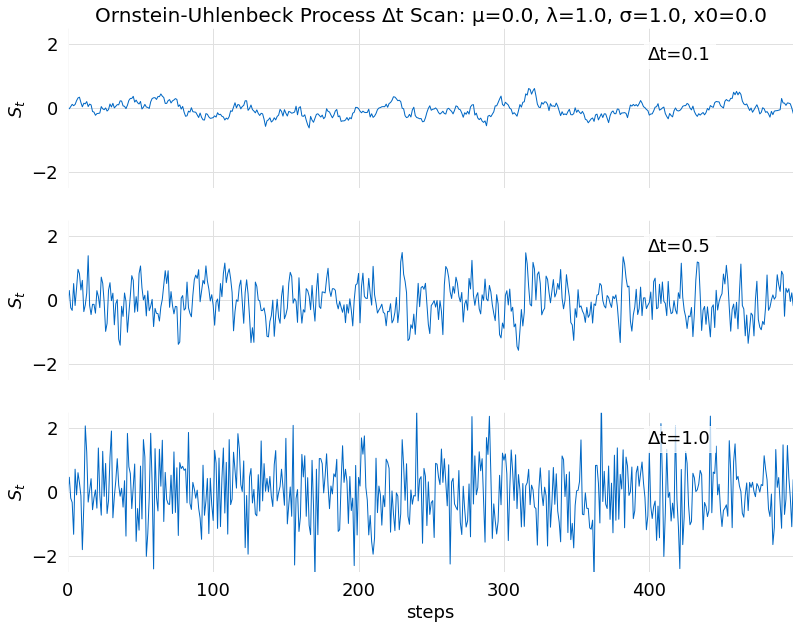

In [43]:
Δt_vals = [0.1, 0.5, 1.0]
μ = 0.0
λ = 1.0
σ = 1.0
x0 = 0.0
npts = 500
labels = [f"Δt={val}" for val in Δt_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt} for Δt in Δt_vals]
title = f"Ornstein-Uhlenbeck Process Δt Scan: μ={μ}, λ={λ}, σ={σ}, x0={x0}"
scan_comparison_plot(labels, title, [-2.5, 2.5], *params)

## $\sigma$ Scan

$\sigma$ is the standard deviation of the random component. If follows that changing it will </br>
scale the random component. This is similar to what is seen with changing $\Delta t$.

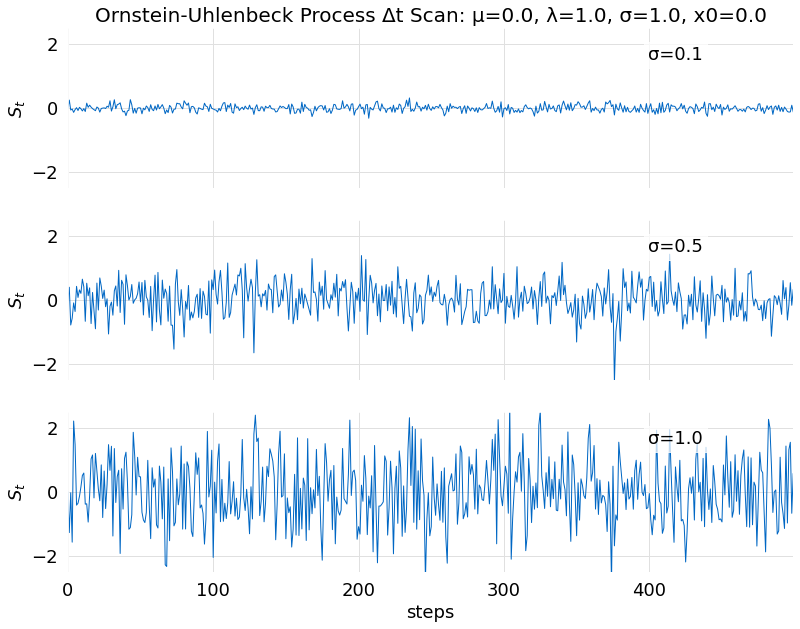

In [28]:
σ_vals = [0.1, 0.5, 1.0]
Δt = 1.0
μ = 0.0
λ = 1.0
x0 = 0.0
npts = 500
labels = [f"σ={val}" for val in σ_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt} for σ in σ_vals]
title = f"Ornstein-Uhlenbeck Process Δt Scan: μ={μ}, λ={λ}, σ={σ}, x0={x0}"
scan_comparison_plot(labels, title, [-2.5, 2.5], *params)

## $\mu$ Scan

$\mu$ is the time asymptotic mean of the Ornstein-Uhlenbeck process and the value about which </br>
mean reversion occurs. It follows that the effect of changing it will shift the value where mean reversion occurs.

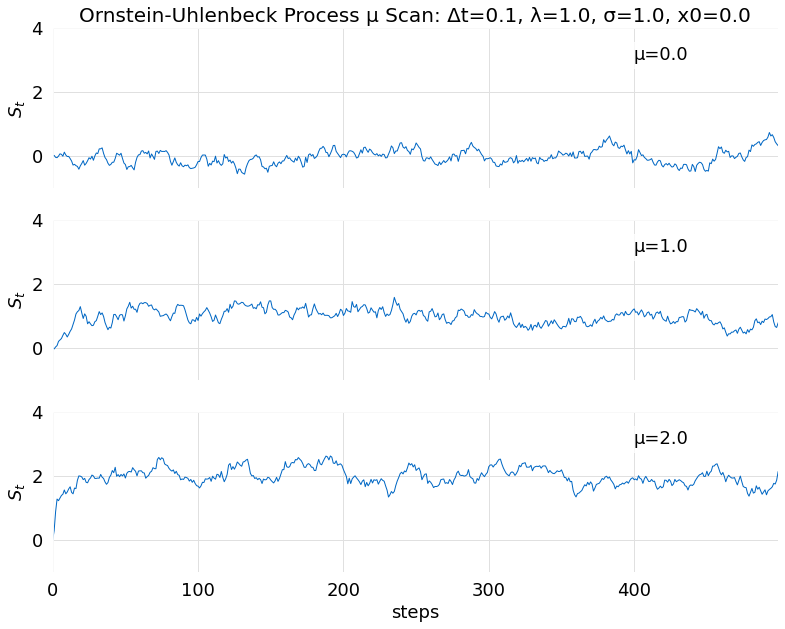

In [29]:
μ_vals = [0.0, 1.0, 2.0]
Δt = 0.1
λ = 1.0
σ = 1.0
x0 = 0.0
npts = 500
labels = [f"μ={val}" for val in μ_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt} for μ in μ_vals]
title = f"Ornstein-Uhlenbeck Process μ Scan: Δt={Δt}, λ={λ}, σ={σ}, x0={x0}"
scan_comparison_plot(labels, title, [-1.0, 4.0], *params)

## $\lambda$ Scan

$\lambda$ defines the half life of mean decay and scales the mean reversion component and for the </br>
the mean, variance and covariance to converge for $t \to \infty$ it must satisfy $\lambda > 0$. It is seen </br>
that larger $\lambda$ crossings of $\mu$ occur with higher frequency.

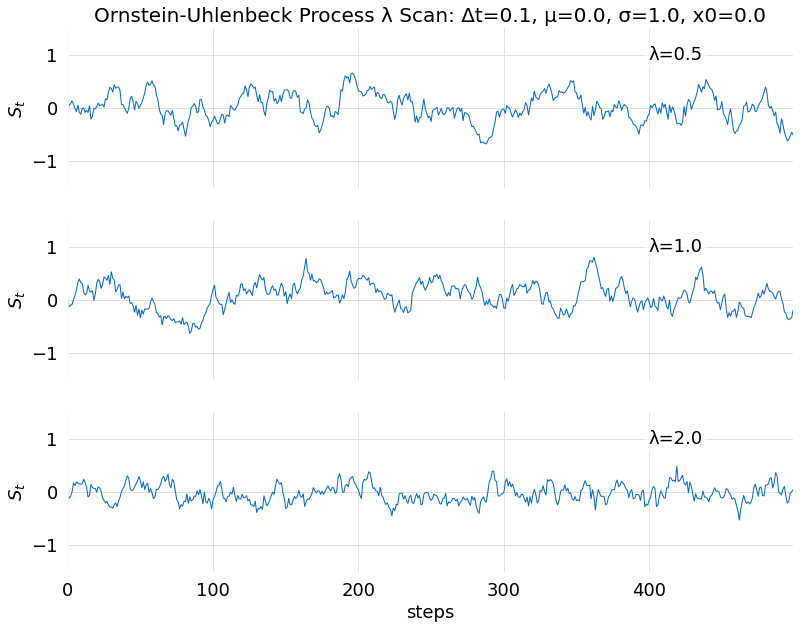

In [34]:
λ_vals = [0.5, 1.0, 2.0]
Δt = 0.1
μ = 0.0
σ = 1.0
x0 = 0.0
npts = 500
labels = [f"λ={val}" for val in λ_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt} for λ in λ_vals]
title = f"Ornstein-Uhlenbeck Process λ Scan: Δt={Δt}, μ={μ}, σ={σ}, x0={x0}"
scan_comparison_plot(labels, title, [-1.5, 1.5], *params)

## $X_0$ Scan

$X_0$ is the initial value of the Ornstein-Uhlenbeck process.

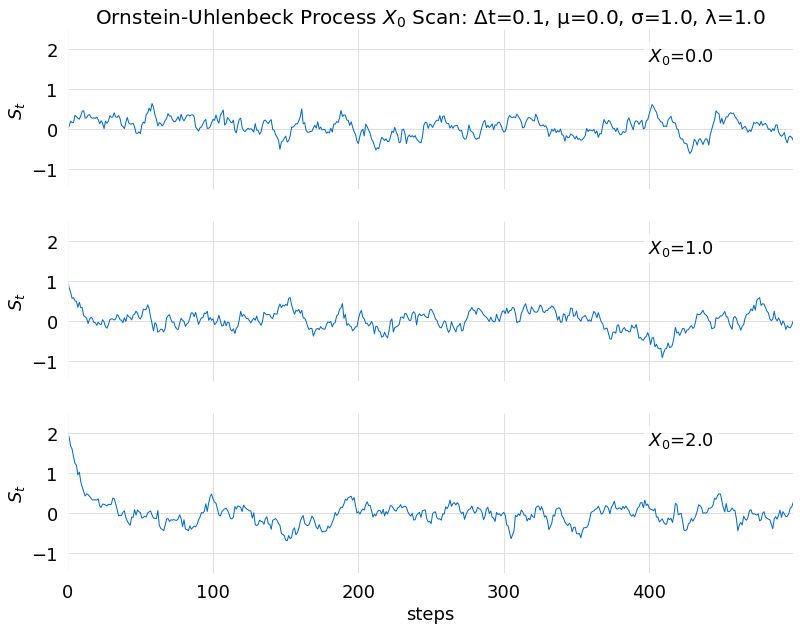

In [41]:
x0_vals = [0.0, 1.0, 2.0]
Δt = 0.1
λ = 1.0
μ = 0.0
σ = 1.0
npts = 500
labels = [f"$X_0$={val}" for val in x0_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "npts": npts, "Δt": Δt} for x0 in x0_vals]
title = f"Ornstein-Uhlenbeck Process $X_0$ Scan: Δt={Δt}, μ={μ}, σ={σ}, λ={λ}"
scan_comparison_plot(labels, title, [-1.5, 2.5], *params)

## Ornstein-Uhlenbeck Solution Distribution Parameter Scan

The Ornstein-Uhlenbeck Process is a model of a mean reverting process. It's solution has a </br>
normal distribution with five parameters,

* $t$ the time.
* $\mu$ the time asymptotic process mean.
* $\lambda$ the time scale of decay to asymptotic mean.
* $\sigma$ the standard deviation of the noise term.
* $X_0$ the initial value of the process.

### $t$ Scan

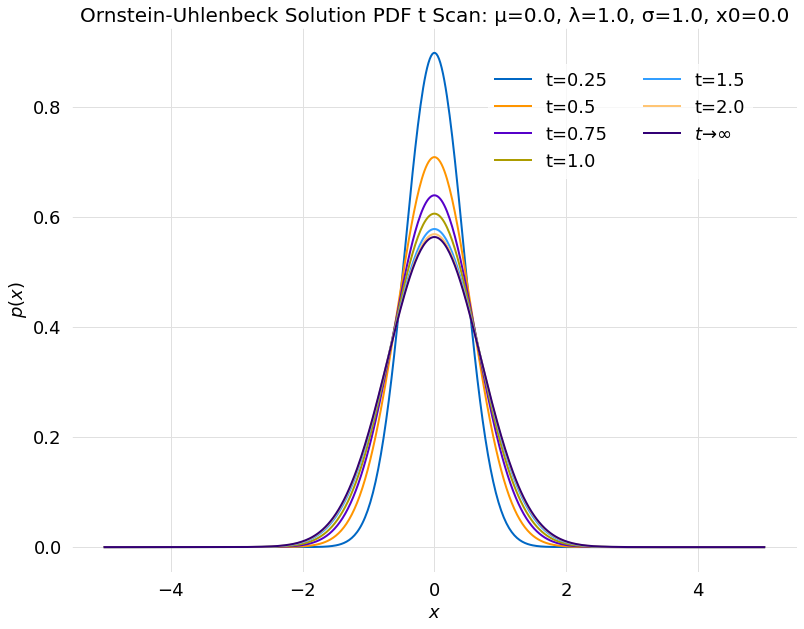

In [35]:
t_vals = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0]
μ = 0.0
λ = 1.0
σ = 1.0
x0 = 0.0
npts = 500
labels = [f"t={val}" for val in t_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "t": t, "npts": npts, "xmin": -5.0*σ, "xmax": 5.0*σ} for t in t_vals]
title = f"Ornstein-Uhlenbeck Solution PDF t Scan: μ={μ}, λ={λ}, σ={σ}, x0={x0}"
scan = OU.Func.PDF.create_parameter_scan(*params)
scan.append(OU.Func.PDF_LIMIT.create(**params[0]))
labels.append(r"$t \to \infty$")
comparison(scan, title=title, labels=labels)

## $\mu$ Scan

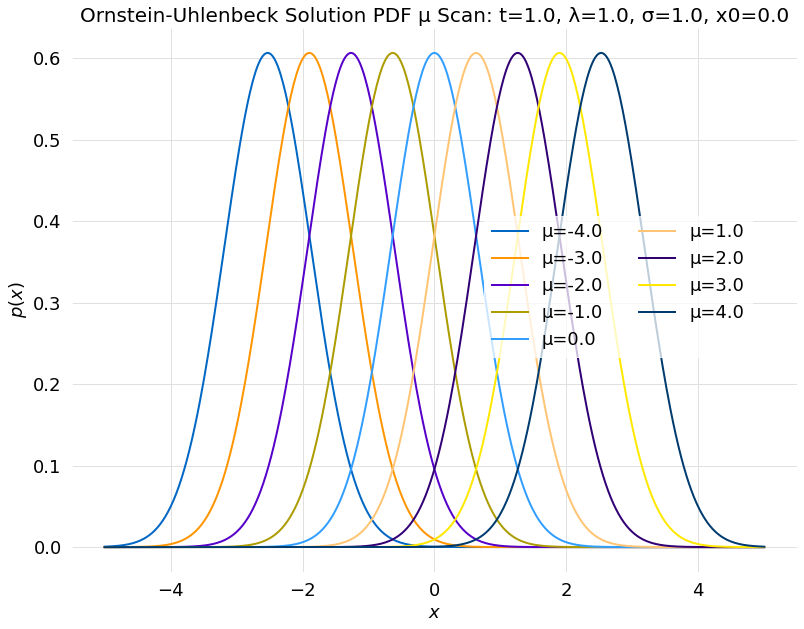

In [22]:
μ_vals = [-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
t = 1.0
λ = 1.0
σ = 1.0
x0 = 0.0
npts = 500
labels = [f"μ={val}" for val in μ_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "t": t, "npts": npts, "xmin": -5.0*σ, "xmax": 5.0*σ} for μ in μ_vals]
title = f"Ornstein-Uhlenbeck Solution PDF μ Scan: t={t}, λ={λ}, σ={σ}, x0={x0}"
pdf_comparison_plot(labels, title, *params)

## $\lambda$ Scan

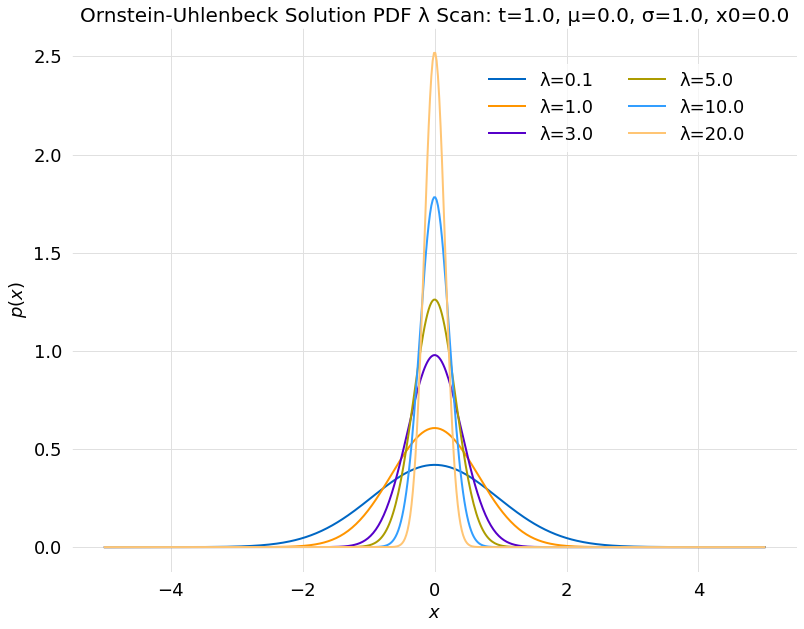

In [27]:
λ_vals = [0.1, 1.0, 3.0, 5.0, 10.0, 20.0]
t = 1.0
μ = 0.0
σ = 1.0
x0 = 0.0
npts = 500
labels = [f"λ={val}" for val in λ_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "t": t, "npts": npts, "xmin": -5.0*σ, "xmax": 5.0*σ} for λ in λ_vals]
title = f"Ornstein-Uhlenbeck Solution PDF λ Scan: t={t}, μ={μ}, σ={σ}, x0={x0}"
pdf_comparison_plot(labels, title, *params)

## $\sigma$ Scan

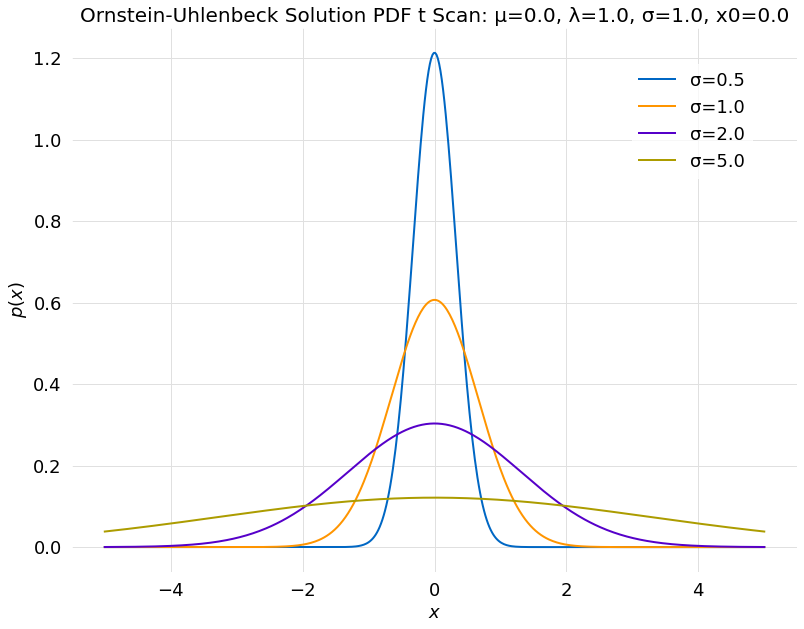

In [32]:
σ_vals = [0.5, 1.0, 2.0, 5.0]
t = 1.0
μ = 0.0
λ = 1.0
x0 = 0.0
npts = 500
labels = [f"σ={val}" for val in σ_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "t": t, "npts": npts, "xmin": -5.0, "xmax": 5.0} for σ in σ_vals]
pdf_comparison_plot(labels, title, *params)

## $X_0$ Scan

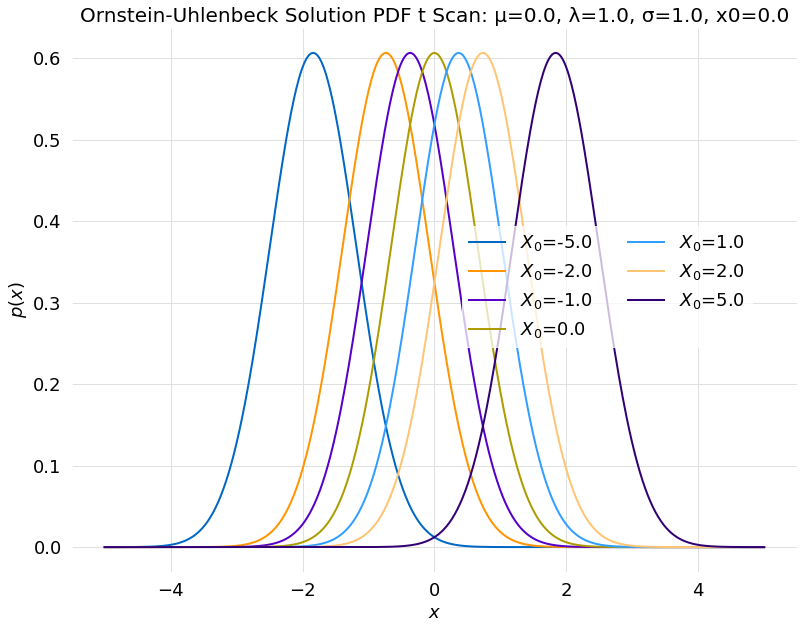

In [34]:
x0_vals = [-5.0, -2.0, -1.0, 0.0, 1.0, 2.0, 5.0]
t = 1.0
μ = 0.0
λ = 1.0
σ = 1.0
npts = 500
labels = [f"$X_0$={val}" for val in x0_vals]
params = [{"μ": μ, "λ": λ, "σ": σ, "x0": x0, "t": t, "npts": npts, "xmin": -5.0*σ, "xmax": 5.0*σ} for x0 in x0_vals]
pdf_comparison_plot(labels, title, *params)

## Ornstein-Uhlenbeck Solution Simulation

The Ornstein-Uhlenbeck Process is a model of a mean reverting process. It's solution has a </br>
normal distribution with five parameters,

* $t$ the time.
* $\mu$ the time asymptotic process mean.
* $\lambda$ the time scale of decay to asymptotic mean.
* $\sigma$ the standard deviation of the noise term.
* $X_0$ the initial value of the process.

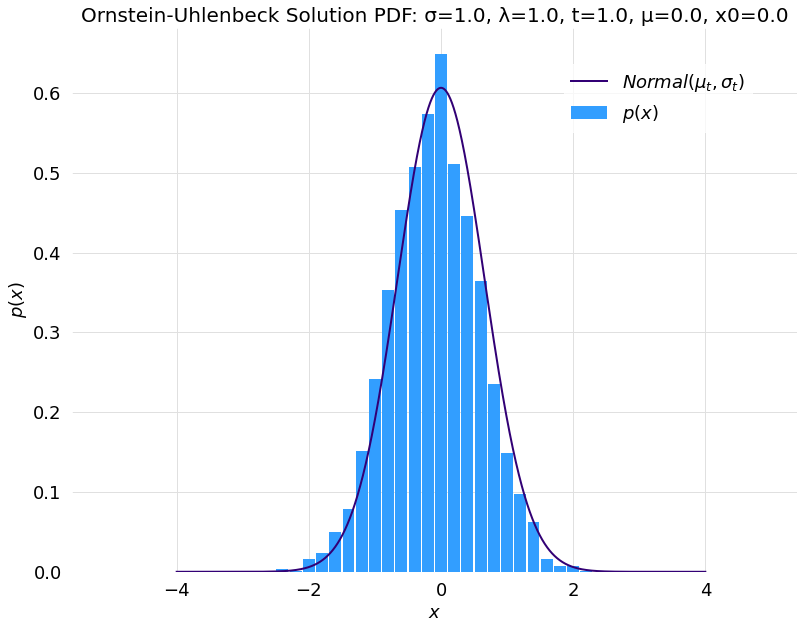

In [76]:
t = 1.0
μ = 0.0
λ = 1.0
σ = 1.0
x0 = 0.0
npts = 5000
params = {"μ": μ, "λ": λ, "σ": σ, "x0": x0, "t": t, "npts": npts, "xmin": -4.0*σ, "xmax": 4.0*σ}
xt = OU.Source.XT.create(**params)
xt_pdf = Stats.Func.PDF_HIST.apply(xt, xmin=-5.0*σ, xmax=5.0*σ)
pdf = OU.Func.PDF.create(**params)
fbar(data=xt_pdf, func=pdf)